In [1]:
import random

import numpy as np
import requests, gzip, os, hashlib
%pylab inline

#fetch data
path = '.'

def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
Y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# part (a) - Applying PCA with 20 components

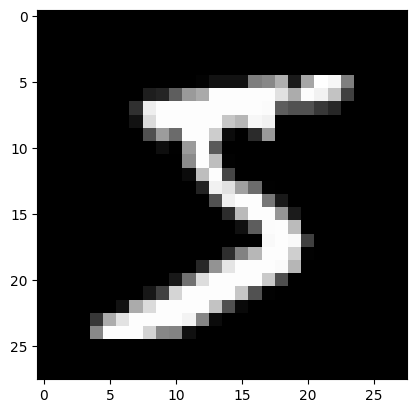

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape((28, 28)),cmap="grey")

In [3]:
# Example on how to perform Dimensionality using SVD
X_centered = X_test - X_test.mean(axis=0)
U, s, vt = np.linalg.svd(X_centered)
c1 = vt.T[:, 0]
c2 = vt.T[:, 1]
c1

array([ 4.10218907e-19,  5.55111512e-17,  2.22044605e-16, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.73472348e-18,
        0.00000000e+00, -1.08420217e-19,  2.71050543e-20,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.82985249e-06,  1.13643471e-05,  7.60833404e-06,
        8.31074797e-06, -6.40434389e-06, -8.45283404e-05, -7.60407823e-05,
       -3.78164862e-05, -1.50150202e-04, -2.45270096e-04, -1.86653782e-04,
       -3.17351967e-05, -9.66288831e-06, -4.96970486e-05, -9.66563434e-05,
       -3.62936409e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [4]:
w2 = vt.T[:, :20]
X_reduced = X_centered.dot(w2)
X_reduced.shape

(10000, 20)

In [5]:
# using Scikit-learn builtin PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_centered = sc.fit_transform(X) # need to scale data, otherwise variables with large values tend to affect the overall variance.
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 20)
X_transformed = pca_model.fit_transform(X_centered)

In [6]:
# 20 components after projecting 784 pixels onto 20.
print(pca_model.explained_variance_)

[40.48763511 29.24169752 26.81180449 20.68661822 18.07665011 15.73317783
 13.7906088  12.5175881  11.00678823 10.05047933  9.62043     8.63093273
  7.99123901  7.81362612  7.3742788   7.12996061  6.71222387  6.5961496
  6.4027204   6.23021527]


In [7]:
# printing explained ratios of PCA - indicates the proportion of variance that lies along each principal component
print(pca_model.explained_variance_ratio_)

[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535091 0.01401717 0.01341739 0.01203736
 0.0111452  0.01089748 0.01028474 0.00994399 0.00936138 0.0091995
 0.00892973 0.00868914]


# part(b) - Fitting Logistic Regression Model on the transformed data with 20 dimensions instead of 784

In [25]:
# performance measures
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_transformed, Y)

/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# training accuracy
y_train_pred = log_model.predict(X_transformed)
print(f"Training accuracy of model is {accuracy_score(y_true=Y, y_pred=y_train_pred)}")
val_accuracy = cross_val_score(log_model,X_transformed, Y, cv=5, scoring="accuracy")
print(f"Validation accuracy of the model across five folds is {[round(i, 2) for i in val_accuracy]}")

Training accuracy of model is 0.8669333333333333


/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Validation accuracy of the model across five folds is [0.87, 0.86, 0.86, 0.86, 0.87]


/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Estimating accuracy of model on test set.
# need to center X_test
X_test_scaled = sc.transform(X_test)
# transform 784 dimension data to 20 dimensions
X_test_transformed = pca_model.transform(X_test_scaled)
y_test_pred = log_model.predict(X_test_transformed)
print(f"Accuracy of model on test set is {accuracy_score(y_true=Y_test, y_pred=y_test_pred)}")

Accuracy of model on test set is 0.8714


# part (c) Train/test split to find best number of principal components

In [35]:
# Train-Validation split
def train_test_split(X, Y):
    rand = np.arange(60000)
    np.random.shuffle(rand)
    train_no = rand[:50000]

    val_no = np.setdiff1d(rand,train_no)

    X_train, X_val = X[train_no, :], X[val_no, :]
    Y_train, Y_val = Y[train_no], Y[val_no]
    return X_train, X_val, Y_train, Y_val

In [45]:
from sklearn.base import BaseEstimator

class PCALogisticRegression(BaseEstimator):
    def __init__(self, num_comps):
        self.num_comps = num_comps
        self.pca_model = PCA(num_comps)
        self.log_model = LogisticRegression()
    def fit(self, X, y):
        X_compressed = self.pca_model.fit_transform(X)
        self.log_model.fit(X_compressed, y)
    def predict(self, X):
        if X.shape[0] != self.num_comps:
            X_compress = self.pca_model.transform(X)
            return self.log_model.predict(X_compress)
        return self.log_model.predict(X)


In [41]:
# select number of components
X_scaled = sc.fit_transform(X)
num_components = np.arange(20, 201, 20)
best_val_accuracy = []
# Write your implementation below
for i in num_components:
    X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y)
    custom_model = PCALogisticRegression(i)
    custom_model.fit(X_train, Y_train)
    y_pred = custom_model.predict(X_val)
    accuracy = accuracy_score(Y_val, y_pred)
    best_val_accuracy.append(accuracy)
    # if accuracy > best_val_accuracy:
    #     best_comps = i
    #     best_val_accuracy = max(best_val_accuracy, accuracy)

/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

<Axes: xlabel='components'>

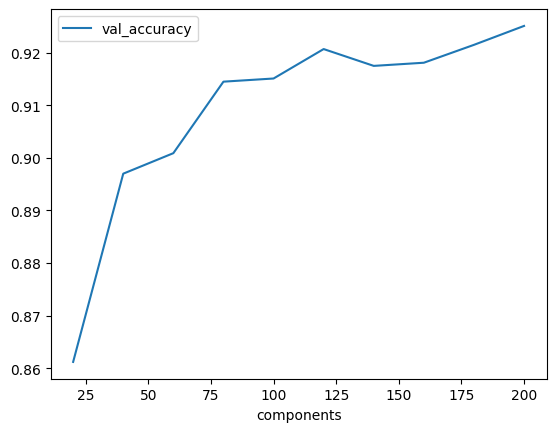

In [44]:
import pandas as pd
val_accuracy_comp = pd.DataFrame()
val_accuracy_comp["components"] = num_components
val_accuracy_comp["val_accuracy"] = best_val_accuracy
val_accuracy_comp.plot(kind="line", x="components", y="val_accuracy")

In [48]:
X_test_scaled = sc.transform(X_test)
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y)
custom_model = PCALogisticRegression(200)
custom_model.fit(X_train, Y_train)
y_train_pred = custom_model.predict(X_train)
y_val_pred = custom_model.predict(X_val)
y_test_pred = custom_model.predict(X_test_scaled)
train_accuracy = accuracy_score(Y_train, y_train_pred)
val_accuracy = accuracy_score(Y_val, y_val_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Training accuracy of the model is {round(train_accuracy, 2)}")
print(f"Validation accuracy of the model is {round(val_accuracy, 2)}")
print(f"Test accuracy of the model is {round(test_accuracy, 2)}")

/Users/jay/opt/anaconda3/envs/ml_a1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy of the model is 0.93
Validation accuracy of the model is 0.92
Test accuracy of the model is 0.93


### We can observe that the model trained on 200 dimensions out performs the model having 20 features because each principal component captures a certain amount of variance in the original data. By including more components, you retain a larger portion of the original data's variance. This means that a greater amount of information from the original features is preserved in the reduced-dimensional space, which can be beneficial for modeling.